In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Read dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset['Class'].sum()

492

The dataset has major class imbalance problem. We see the fraud cases less than valid transactions.

Fraud Cases: 492
Valid Transactions: 284315


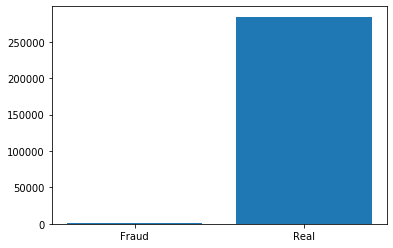

In [4]:
label_size = [dataset['Class'].sum(), len(dataset['Class'])- dataset['Class'].sum()]
plt.bar(['Fraud','Real'],label_size)
print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0]))) 

In [5]:
print('Fraud cases')
print(dataset[dataset['Class']==1]['Amount'].describe())
print('Valid transactions')
print(dataset[dataset['Class']==0]['Amount'].describe())

Fraud cases
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Valid transactions
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# Split data 
Split the data to X and y - where y will be the class labels. 

In [6]:
#separating the X and the Y values
X = dataset.drop(['Class'], axis = 1) 
y = dataset["Class"].values
print(X.shape) 
print(y.shape) 
X = X.values 


(284807, 30)
(284807,)


Using the train_test_split, split the data to training set and testing set.

In [7]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# Train model
I used SVC - Support Vector Classifier. The predicted values is displayed along with the actual outcomes.

In [8]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
df = pd.DataFrame({'Predicted values' : y_pred, 'Actual_values': y_test})
df

,Predicted values,Actual_values
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
56957,0,0
56958,0,0
56959,0,0
56960,0,0


# Results metrics
Results are shown with metrics like accuracy, precision, recall etc.

In [9]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
  
n_errors = (y_pred != y_test).sum() 
print("The model used is Support Vector classifier") 
  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)) 
print("The F1-Score is {}".format(f1)) 
  

The model used is Support Vector classifier
The accuracy is 0.9982795547909132
The precision is 0.9982795547909132
The recall is 1.0
The F1-Score is 0.999139036775429


True Positives (TP): 0
True Negatives (TN): 56864
False Positives (FP): 0
False Negatives (FN): 98


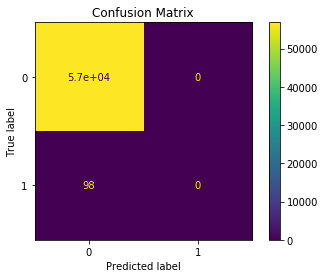

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
classifier = SVC()
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN values
tn, fp, fn, tp = confusion.ravel()

# Print TP, TN, FP, FN
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Plot the confusion matrix
plot_confusion_matrix(classifier, x_test, y_test)
plt.title("Confusion Matrix")
plt.show()
